# 판다스 시각화

데이터를 그리기 위해 필요한 라이브러리들을 임포트한다.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 기본 그리기
시리즈를 사용해서 데이터를 시각해보자.

<AxesSubplot:>

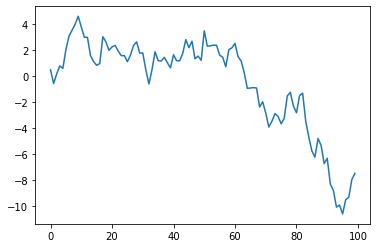

In [17]:
# 넘파이로 정규화된 데이터 100개를 구성하고 cumsum 사용해 누적합을 계산한다.
se0 = pd.Series(np.random.randn(100).cumsum())
se0.plot() # 메모리에 그림을 그려요. 
# plt.show()

<AxesSubplot:>

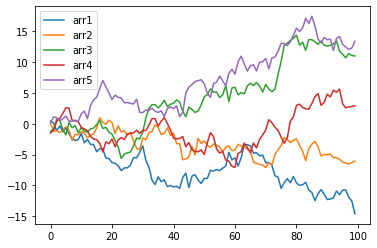

In [20]:
df = pd.DataFrame(np.random.randn(100, 5).cumsum(0),
                  columns= ['arr1', 'arr2', 'arr3', 'arr4', 'arr5'] )
df.plot()

## 막대 그래프 그리기

<AxesSubplot:>

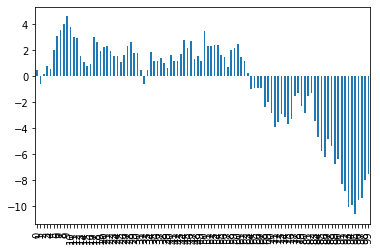

In [22]:
se0.plot(kind='bar')

<AxesSubplot:>

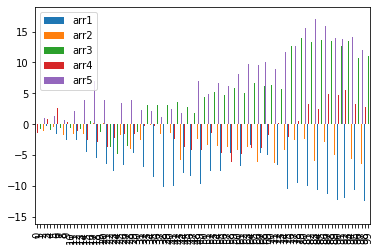

In [24]:
df.plot(kind='bar')

옆으로 바 차트 그리기

<AxesSubplot:>

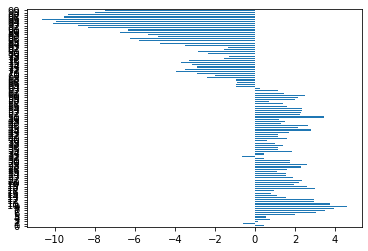

In [25]:
se0.plot(kind='barh')

<AxesSubplot:>

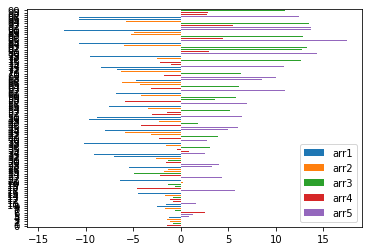

In [26]:
df.plot(kind='barh')

<AxesSubplot:>

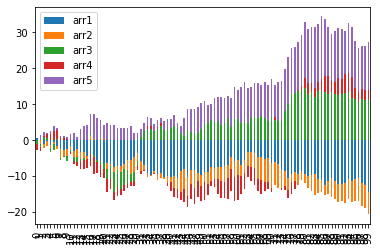

In [27]:
df.plot(kind='bar', stacked=True)

## 히스토그램
값의 빈도를 분리해서 출력

<AxesSubplot:>

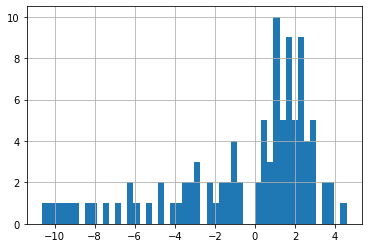

In [29]:
se0.hist(bins=50)

array([[<AxesSubplot:title={'center':'arr1'}>,
        <AxesSubplot:title={'center':'arr2'}>],
       [<AxesSubplot:title={'center':'arr3'}>,
        <AxesSubplot:title={'center':'arr4'}>],
       [<AxesSubplot:title={'center':'arr5'}>, <AxesSubplot:>]],
      dtype=object)

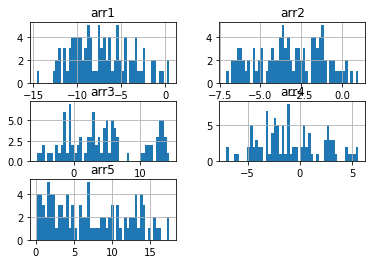

In [31]:
df.hist(bins=50)

## 커널 밀도 추정 그래프

<AxesSubplot:ylabel='Density'>

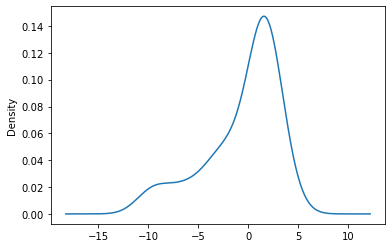

In [33]:
se0.plot(kind='kde')

<AxesSubplot:ylabel='Density'>

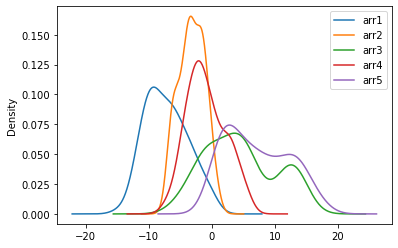

In [34]:
df.plot(kind='kde')

## 그래프 중첩 그리기

<AxesSubplot:ylabel='Density'>

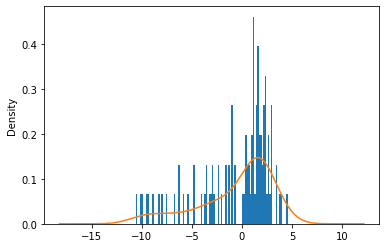

In [38]:
se0.hist(bins=100,  density=True)
se0.plot(kind='kde')

# iris 데이터를 활용한 산포도 그리기

In [40]:
from sklearn import datasets

iris = datasets.load_iris()
irisdt = pd.DataFrame(iris['data'], columns=iris['feature_names'])
irisdt

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


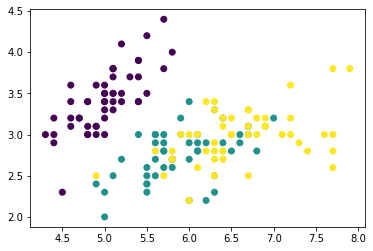

In [47]:
plt.scatter(irisdt['sepal length (cm)'], irisdt['sepal width (cm)'], c=iris.target)

## 연습문제
for 문을 사용해 iris 데이터의 12개의 그림을 모두 그려보자.

In [ ]:
plt.plot()